In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from IPython.display import Image, display
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import SGD
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

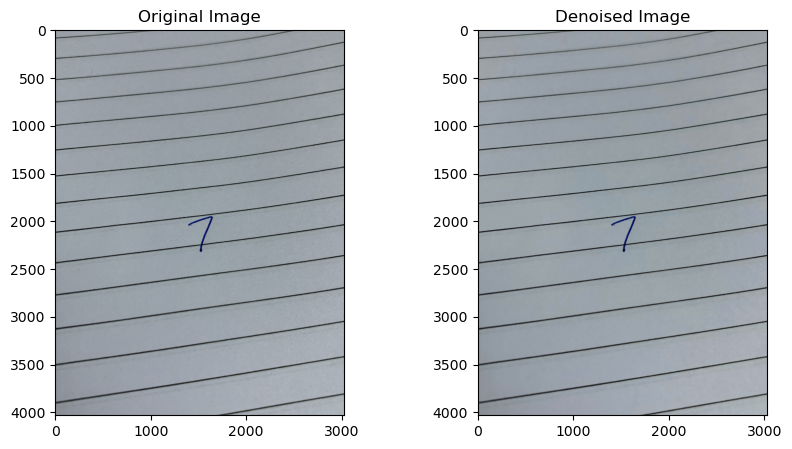

In [43]:
image = cv2.imread('C:\\Users\\acer\\OneDrive\\Documents\\Dev Work\\AI\\ML\\IMG_7856.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

denoised_image = cv2.fastNlMeansDenoisingColored(image_rgb, None, 10, 10, 7, 21)

# Display the original and denoised images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image)
plt.title('Denoised Image')

plt.show()

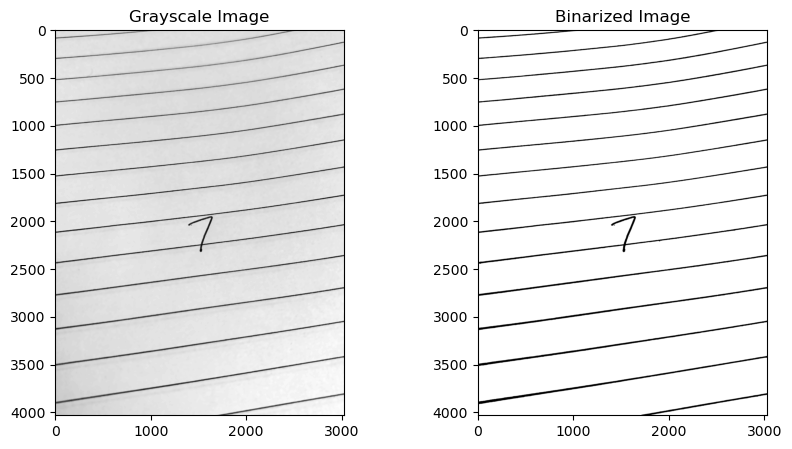

In [44]:
gray_image = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binarized Image')

plt.show()

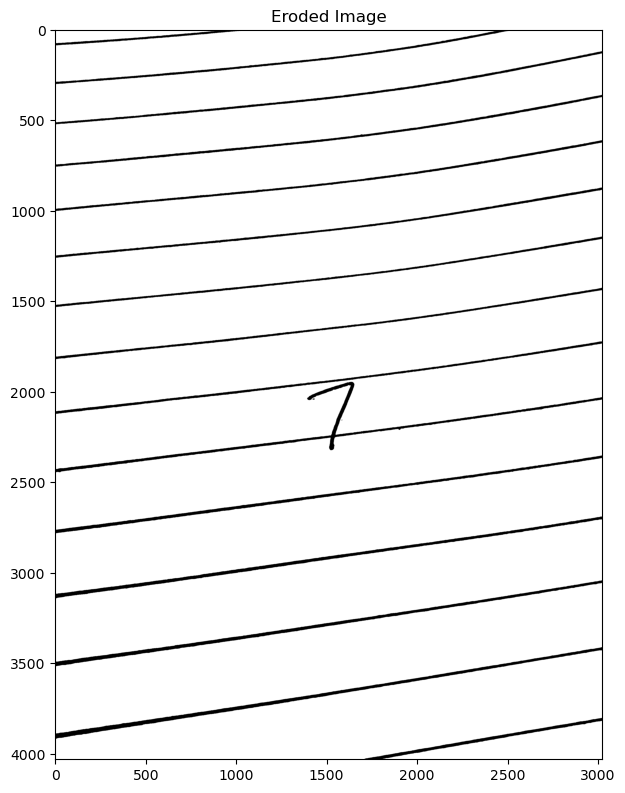

In [63]:
kernel = np.ones((1, 1), np.uint8)  # thickness 
eroded_image = cv2.erode(binary_image, kernel, iterations=1)  # more darker the number will get 
plt.figure(figsize=(24, 24))
plt.subplot(1, 3, 1)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')

plt.show()

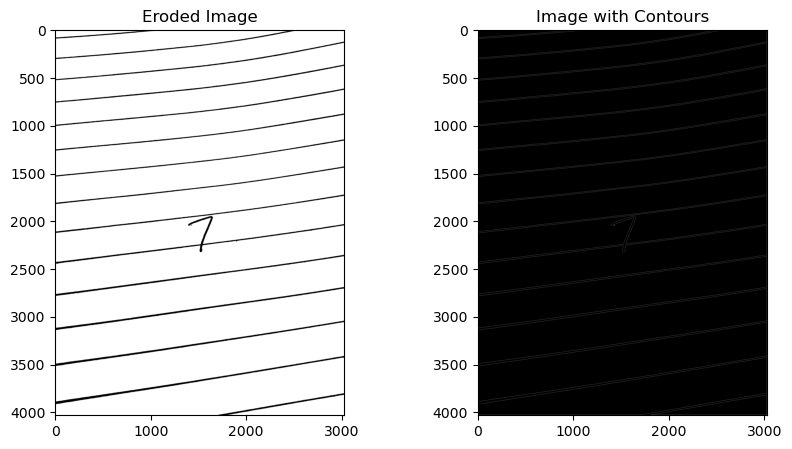

In [80]:
contours, hierarchy = cv2.findContours(eroded_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_contours_contours = np.zeros(eroded_image.shape, dtype=np.uint8)

cv2.drawContours(img_contours_contours, contours, -1, (255, 255, 255), 1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')

plt.subplot(1, 2, 2)
plt.imshow(img_contours_contours, cmap='gray')
plt.title('Image with Contours')

plt.show()

In [2]:
train_data= pd.read_csv('C:\\Users\\acer\\OneDrive\\Documents\\Dev Work\\AI\\ML\\mnist_train.csv')
test_data = pd.read_csv('C:\\Users\\acer\\OneDrive\\Documents\\Dev Work\\AI\\ML\\mnist_test.csv')

In [3]:
train_data.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
y_train = train_data.pop('label').values
X_train = train_data.values.reshape(-1, 28, 28, 1) / 255.0  # Reshape and normalize
y_test = test_data.pop('label').values
X_test = test_data.values.reshape(-1, 28, 28, 1) / 255.0  # Reshape and normalize

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Splitting training data to include a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


KeyError: 'label'

In [82]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [83]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [84]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3670 - accuracy: 0.8826 - val_loss: 0.0697 - val_accuracy: 0.9789
Epoch 2/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1399 - accuracy: 0.9587 - val_loss: 0.0571 - val_accuracy: 0.9840
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1031 - accuracy: 0.9688 - val_loss: 0.0518 - val_accuracy: 0.9849
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0856 - accuracy: 0.9747 - val_loss: 0.0456 - val_accuracy: 0.9870
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0765 - accuracy: 0.9761 - val_loss: 0.0382 - val_accuracy: 0.9888
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0646 - accuracy: 0.9803 - val_loss: 0.0394 - val_accuracy: 0.9888
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0571 - accuracy: 0.9819 - val_loss: 0.0378 - val_accuracy:

In [85]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


313/313 [==============================] - 1s 2ms/step - loss: 0.0391 - accuracy: 0.9881
Test Accuracy: 0.988099992275238


In [87]:
img = cv2.resize(eroded_image, (28, 28))  
img = img / 255.0  
img = img.reshape(1, 28, 28, 1)  

# Predict the digit
predictions = model.predict(img)
predicted_digit = np.argmax(predictions)

print(f"Predicted Digit: {predicted_digit}")

1/1 [==============================] - 0s 16ms/step
Predicted Digit: 8


In [94]:
def correct_slope(img):
    # Detect edges in the image
    edges = cv2.Canny(img, 50, 150, apertureSize=3)
    
    # Use Hough transform to detect lines in the image
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=80, minLineLength=30, maxLineGap=10)
    
    # Calculate the angle of each line
    angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.arctan2(y2 - y1, x2 - x1) * 180. / np.pi
        angles.append(angle)
    
    # Compute the median angle of all lines
    median_angle = np.median(angles)
    
    # Rotate the image to correct the slope
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, median_angle, 1.0)
    corrected_img = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    return corrected_img



In [95]:
def correct_slope(img):
    # Detect edges in the image
    edges = cv2.Canny(img, 50, 150, apertureSize=3)
    
    # Use Hough transform to detect lines in the image
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=80, minLineLength=30, maxLineGap=10)
    
    # Initialize the median angle to zero
    median_angle = 0
    
    # If lines are detected, calculate the median angle
    if lines is not None:
        angles = [np.arctan2(y2 - y1, x2 - x1) * 180. / np.pi for x1, y1, x2, y2 in lines[:, 0]]
        median_angle = np.median(angles)
    
    # Rotate the image to correct the slope
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, median_angle, 1.0)
    corrected_img = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    return corrected_img




In [96]:
# Load the eroded image
eroded_image = cv2.imread('path_to_eroded_image.png', cv2.IMREAD_GRAYSCALE)

# Apply slope correction
slope_corrected_image = correct_slope(eroded_image)

# Apply slant correction
final_corrected_image = 25(slope_corrected_image)

# Display the result
cv2.imshow('Slope & Slant Corrected Image', final_corrected_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

<>:8: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:8: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?


AttributeError: 'NoneType' object has no attribute 'shape'